## Preprocessing our dataset before building a machine learning model:

Standard Imports:

In [63]:
import pandas as pd
import numpy as np

Importing .csv file using pandas .read_csv function:

In [64]:
trek_data = pd.read_csv("../Data/trekkers_df_with_bias_copy.csv")
# drop data where Email-ID is duplicated
trek_data = trek_data.drop_duplicates(subset = "Email-ID")
# reset index
trek_data = trek_data.reset_index(drop = True)
trek_data["trekker_id"] = trek_data.index
trek_data

,Email-ID,Name,Height,Weight,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek,trekker_id
0,carminedehmel@web.de,Ilonka Pergande,163,57,23,Male,Pune,Pimpri,['Marathi' 'Hindi' 'English'],VIT,Unemployed,Y,['Sunday' 'Saturday' 'Monday' 'Friday' 'Wednes...,4,Beginner,0
1,vera47@paertzelt.net,Bozena Radisch-Henk,142,72,22,Male,Pune,Nal Stop,['English' 'Other' 'Marathi'],VIT,Student,Y,['Saturday'],3,Intermediate,1
2,wloeffler@schweitzer.org,Konrad Fischer,156,62,38,Female,Pune,Aundh,['Marathi' 'Hindi' 'Other'],PICT,Student,Y,['Sunday' 'Saturday' 'Friday'],3,Beginner,2
3,henning44@gehringer.com,Gerwin Schenk B.A.,167,84,38,Female,Mumbai,Borivali,['Marathi' 'Hindi' 'Other'],MIT-ADT,Student,N,['Sunday' 'Saturday' 'Monday' 'Friday'],0,Intermediate,3
4,budigmartin@haering.de,Ing. Deborah Schäfer B.Eng.,153,57,22,Male,Pune,Pimpri,['Hindi'],MIT-WPU,Student,N,['Friday' 'Saturday' 'Monday' 'Sunday' 'Wednes...,0,Intermediate,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,sabri11@sontag.de,Reinhart Gehringer,162,60,31,Male,Pune,Kothrud,['Marathi'],VIT,Student,Y,['Sunday' 'Friday' 'Monday'],2,Experienced,9982
9983,sandy10@gmail.com,Univ.Prof. Heide Hornich,154,65,25,Male,Kolhapur,Kasaba Bawada,['English'],PCCOE,Student,N,['Friday'],0,Experienced,9983
9984,annemie12@gmail.com,Dipl.-Ing. Elwira Schottin,151,83,15,Male,Pune,Kothrud,['Marathi' 'Hindi' 'Other'],SPPU,Student,Y,['Saturday' 'Friday' 'Sunday' 'Thursday'],4,Experienced,9984
9985,helmuth80@stahr.com,Gitta Heydrich,155,79,60,Female,Pune,Kothrud,['Hindi'],PCCOE,Unemployed,Y,['Saturday'],1,Intermediate,9985


Checking if our dataset has any missing values:

In [65]:
trek_data.isna().sum()

Email-ID                  0
Name                      0
Height                    0
Weight                    0
Age                       0
Gender                    0
City                      0
Locality                  0
Languages                 0
college                   0
Profession                0
Have you gone Trekking    0
Preferred Days            0
Number of Treks           0
Difficulty of Trek        0
trekker_id                0
dtype: int64

Identifying different types of datatypes in our dataset

In [66]:
trek_data.dtypes

Email-ID                  object
Name                      object
Height                     int64
Weight                     int64
Age                        int64
Gender                    object
City                      object
Locality                  object
Languages                 object
college                   object
Profession                object
Have you gone Trekking    object
Preferred Days            object
Number of Treks            int64
Difficulty of Trek        object
trekker_id                 int64
dtype: object

In [67]:
trek_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9987 entries, 0 to 9986
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Email-ID                9987 non-null   object
 1   Name                    9987 non-null   object
 2   Height                  9987 non-null   int64 
 3   Weight                  9987 non-null   int64 
 4   Age                     9987 non-null   int64 
 5   Gender                  9987 non-null   object
 6   City                    9987 non-null   object
 7   Locality                9987 non-null   object
 8   Languages               9987 non-null   object
 9   college                 9987 non-null   object
 10  Profession              9987 non-null   object
 11  Have you gone Trekking  9987 non-null   object
 12  Preferred Days          9987 non-null   object
 13  Number of Treks         9987 non-null   int64 
 14  Difficulty of Trek      9987 non-null   object
 15  trek

note: Here we need to convert our categorical data to numerical data for implementing our ML model

In [68]:
trek_data.describe()

,Height,Weight,Age,Number of Treks,trekker_id
count,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000
mean,159.477120,69.481125,29.693401,1.758486,4993.000000
std,10.081917,9.969115,9.418637,1.445362,2883.142903
min,122.000000,29.000000,10.000000,0.000000,0.000000
25%,153.000000,63.000000,23.000000,0.000000,2496.500000
50%,160.000000,70.000000,29.000000,2.000000,4993.000000
75%,166.000000,76.000000,36.000000,3.000000,7489.500000
max,198.000000,106.000000,71.000000,6.000000,9986.000000


In [69]:
trek_data

,Email-ID,Name,Height,Weight,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek,trekker_id
0,carminedehmel@web.de,Ilonka Pergande,163,57,23,Male,Pune,Pimpri,['Marathi' 'Hindi' 'English'],VIT,Unemployed,Y,['Sunday' 'Saturday' 'Monday' 'Friday' 'Wednes...,4,Beginner,0
1,vera47@paertzelt.net,Bozena Radisch-Henk,142,72,22,Male,Pune,Nal Stop,['English' 'Other' 'Marathi'],VIT,Student,Y,['Saturday'],3,Intermediate,1
2,wloeffler@schweitzer.org,Konrad Fischer,156,62,38,Female,Pune,Aundh,['Marathi' 'Hindi' 'Other'],PICT,Student,Y,['Sunday' 'Saturday' 'Friday'],3,Beginner,2
3,henning44@gehringer.com,Gerwin Schenk B.A.,167,84,38,Female,Mumbai,Borivali,['Marathi' 'Hindi' 'Other'],MIT-ADT,Student,N,['Sunday' 'Saturday' 'Monday' 'Friday'],0,Intermediate,3
4,budigmartin@haering.de,Ing. Deborah Schäfer B.Eng.,153,57,22,Male,Pune,Pimpri,['Hindi'],MIT-WPU,Student,N,['Friday' 'Saturday' 'Monday' 'Sunday' 'Wednes...,0,Intermediate,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,sabri11@sontag.de,Reinhart Gehringer,162,60,31,Male,Pune,Kothrud,['Marathi'],VIT,Student,Y,['Sunday' 'Friday' 'Monday'],2,Experienced,9982
9983,sandy10@gmail.com,Univ.Prof. Heide Hornich,154,65,25,Male,Kolhapur,Kasaba Bawada,['English'],PCCOE,Student,N,['Friday'],0,Experienced,9983
9984,annemie12@gmail.com,Dipl.-Ing. Elwira Schottin,151,83,15,Male,Pune,Kothrud,['Marathi' 'Hindi' 'Other'],SPPU,Student,Y,['Saturday' 'Friday' 'Sunday' 'Thursday'],4,Experienced,9984
9985,helmuth80@stahr.com,Gitta Heydrich,155,79,60,Female,Pune,Kothrud,['Hindi'],PCCOE,Unemployed,Y,['Saturday'],1,Intermediate,9985


In [70]:
import matplotlib.pyplot as plt

In [71]:
# get names of people who have the same age using groupby
# and count the number of people in each group
# then sort the values in descending order

age_aggregate = trek_data.groupby(by="Age").groups

In [72]:
for age in age_aggregate:
    print(f"Age: {age}")
    print(trek_data.loc[age_aggregate[age], ["Name", "Age"]])

Age: 10
                             Name  Age
219                   Emma Köhler   10
265          Prof. Annedore Heinz   10
491       Tadeusz Stoll-Holzapfel   10
572    Christos Lindner-Holzapfel   10
774                 Calogero Beer   10
...                           ...  ...
8598               Victor Mohaupt   10
8794             Folkert Mosemann   10
9182               Sybilla Häring   10
9813                 Anke Schäfer   10
9882  Dipl.-Ing. Carolin Barkholz   10

[67 rows x 2 columns]
Age: 11
                            Name  Age
20       Dr. Nuray Schomber B.A.   11
46        Stefania Röhricht B.A.   11
117         Svenja Schomber MBA.   11
487      Zbigniew Wieloch B.Eng.   11
603         Krista Rörricht MBA.   11
...                          ...  ...
9394                  Katy Hörle   11
9427  Cathleen Staude-Gierschner   11
9528              Martin Mentzel   11
9677             Roswitha Adolph   11
9748        Traude Etzler B.Eng.   11

[80 rows x 2 columns]
Age: 12
      

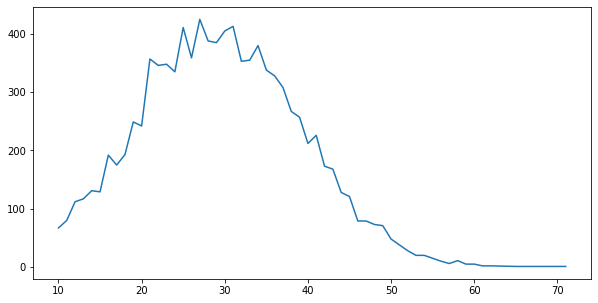

In [73]:
# aggregate the data by age and count the number of people in each group
age_aggregate = trek_data.groupby(by="Age").count()
# plot the data
plt.figure(figsize=(10, 5))
plt.plot(age_aggregate.index, age_aggregate["trekker_id"])

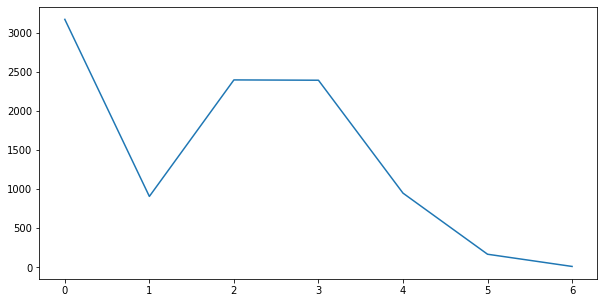

In [74]:
# aggregate by number of treks and count the number of people in each group
trek_aggregate = trek_data.groupby(by="Number of Treks").count()
# plot the data
plt.figure(figsize=(10, 5))
plt.plot(trek_aggregate.index, trek_aggregate["trekker_id"])


In [75]:
from sklearn.preprocessing import LabelEncoder

# create a label encoder object
le = LabelEncoder()

trek_data.columns

Index(['Email-ID', 'Name', 'Height', 'Weight', 'Age', 'Gender', 'City',
       'Locality', 'Languages', 'college', 'Profession',
       'Have you gone Trekking', 'Preferred Days', 'Number of Treks',
       'Difficulty of Trek', 'trekker_id'],
      dtype='object')

In [76]:
for categorical_data in ["Gender","City","Locality","Have you gone Trekking","Profession","college","Difficulty of Trek"]:
    # fit and transform the data
    trek_data[categorical_data] = le.fit_transform(trek_data[categorical_data])

In [77]:
trek_data

,Email-ID,Name,Height,Weight,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek,trekker_id
0,carminedehmel@web.de,Ilonka Pergande,163,57,23,1,4,19,['Marathi' 'Hindi' 'English'],5,1,1,['Sunday' 'Saturday' 'Monday' 'Friday' 'Wednes...,4,0,0
1,vera47@paertzelt.net,Bozena Radisch-Henk,142,72,22,1,4,17,['English' 'Other' 'Marathi'],5,0,1,['Saturday'],3,2,1
2,wloeffler@schweitzer.org,Konrad Fischer,156,62,38,0,4,2,['Marathi' 'Hindi' 'Other'],3,0,1,['Sunday' 'Saturday' 'Friday'],3,0,2
3,henning44@gehringer.com,Gerwin Schenk B.A.,167,84,38,0,1,5,['Marathi' 'Hindi' 'Other'],0,0,0,['Sunday' 'Saturday' 'Monday' 'Friday'],0,2,3
4,budigmartin@haering.de,Ing. Deborah Schäfer B.Eng.,153,57,22,1,4,19,['Hindi'],1,0,0,['Friday' 'Saturday' 'Monday' 'Sunday' 'Wednes...,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,sabri11@sontag.de,Reinhart Gehringer,162,60,31,1,4,16,['Marathi'],5,0,1,['Sunday' 'Friday' 'Monday'],2,1,9982
9983,sandy10@gmail.com,Univ.Prof. Heide Hornich,154,65,25,1,0,14,['English'],2,0,0,['Friday'],0,1,9983
9984,annemie12@gmail.com,Dipl.-Ing. Elwira Schottin,151,83,15,1,4,16,['Marathi' 'Hindi' 'Other'],4,0,1,['Saturday' 'Friday' 'Sunday' 'Thursday'],4,1,9984
9985,helmuth80@stahr.com,Gitta Heydrich,155,79,60,0,4,16,['Hindi'],2,1,1,['Saturday'],1,2,9985


In [78]:
# Languages column is of type object
# convert it to a list
# remove [ and ] from the string
# split the string by comma


trek_data["Languages"] = trek_data["Languages"].apply(lambda x: x[1:-1].split())
trek_data["Preferred Days"] = trek_data["Preferred Days"].apply(lambda x: x[1:-1].split())

In [79]:
type(trek_data["Languages"][0][0])

str

In [80]:
# apply label encoder to each element of the list
trek_data["Languages"] = trek_data["Languages"].apply(lambda x: le.fit_transform(x))
trek_data["Preferred Days"] = trek_data["Preferred Days"].apply(lambda x: le.fit_transform(x))

In [81]:
trek_data

,Email-ID,Name,Height,Weight,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek,trekker_id
0,carminedehmel@web.de,Ilonka Pergande,163,57,23,1,4,19,"[2, 1, 0]",5,1,1,"[3, 2, 1, 0, 5, 4]",4,0,0
1,vera47@paertzelt.net,Bozena Radisch-Henk,142,72,22,1,4,17,"[0, 2, 1]",5,0,1,[0],3,2,1
2,wloeffler@schweitzer.org,Konrad Fischer,156,62,38,0,4,2,"[1, 0, 2]",3,0,1,"[2, 1, 0]",3,0,2
3,henning44@gehringer.com,Gerwin Schenk B.A.,167,84,38,0,1,5,"[1, 0, 2]",0,0,0,"[3, 2, 1, 0]",0,2,3
4,budigmartin@haering.de,Ing. Deborah Schäfer B.Eng.,153,57,22,1,4,19,[0],1,0,0,"[0, 2, 1, 3, 4]",0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,sabri11@sontag.de,Reinhart Gehringer,162,60,31,1,4,16,[0],5,0,1,"[2, 0, 1]",2,1,9982
9983,sandy10@gmail.com,Univ.Prof. Heide Hornich,154,65,25,1,0,14,[0],2,0,0,[0],0,1,9983
9984,annemie12@gmail.com,Dipl.-Ing. Elwira Schottin,151,83,15,1,4,16,"[1, 0, 2]",4,0,1,"[1, 0, 2, 3]",4,1,9984
9985,helmuth80@stahr.com,Gitta Heydrich,155,79,60,0,4,16,[0],2,1,1,[0],1,2,9985


In [82]:
# create BMI column
trek_data["BMI"] = trek_data["Weight"] / (trek_data["Height"] / 100) ** 2

In [83]:
# drop the columns that are not required 
trek_data = trek_data.drop(columns = ["Name", "Email-ID", "Weight", "Height"])

In [84]:
trek_data

,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek,trekker_id,BMI
0,23,1,4,19,"[2, 1, 0]",5,1,1,"[3, 2, 1, 0, 5, 4]",4,0,0,21.453574
1,22,1,4,17,"[0, 2, 1]",5,0,1,[0],3,2,1,35.707201
2,38,0,4,2,"[1, 0, 2]",3,0,1,"[2, 1, 0]",3,0,2,25.476660
3,38,0,1,5,"[1, 0, 2]",0,0,0,"[3, 2, 1, 0]",0,2,3,30.119402
4,22,1,4,19,[0],1,0,0,"[0, 2, 1, 3, 4]",0,2,4,24.349609
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,31,1,4,16,[0],5,0,1,"[2, 0, 1]",2,1,9982,22.862369
9983,25,1,0,14,[0],2,0,0,[0],0,1,9983,27.407657
9984,15,1,4,16,"[1, 0, 2]",4,0,1,"[1, 0, 2, 3]",4,1,9984,36.401912
9985,60,0,4,16,[0],2,1,1,[0],1,2,9985,32.882414


In [88]:
# apply k++ means clustering to the data
from sklearn.cluster import KMeans

# create a kmeans object
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=42)


# fit the data
kmeans.fit(trek_data)

# get the labels
labels = kmeans.labels_

# add the labels to the data
trek_data["labels"] = labels


trek_data

ValueError: setting an array element with a sequence.

In [25]:
trek_data.to_csv("../Data/trekkers_df_encoded.csv", index = False)

In [23]:
# pick a random row from the dataframe
random = trek_data.iloc[np.random.randint(0, len(trek_data))]

In [24]:
random

Age                                          30
Gender                                        1
City                                          3
Locality                                     21
Languages                             [2, 0, 1]
college                                       5
Profession                                    9
Have you gone Trekking                        1
Preferred Days            [6, 3, 0, 2, 4, 1, 5]
Number of Treks                               4
Difficulty of Trek                            2
trekker_id                                 5810
BMI                                   28.360352
Name: 5810, dtype: object

In [25]:
# lets try one hot encoding on the original dataframe 
trek_data = pd.read_csv("../Data/trekkers_df.csv")
trek_data = trek_data.drop_duplicates(subset = "Email-ID")
trek_data = trek_data.reset_index(drop = True)

In [26]:
trek_data

,Email-ID,Name,Height,Weight,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek
0,lilianelangern@gmx.de,Violetta Täsche,178,81,28,M,Nashik,Ambad,['Marathi'],PCCOE,Lawyer,Y,['Saturday'],4,Beginner
1,schmidtramona@aol.de,Herr Hans-Albert Mangold,167,81,30,None,Mumbai,Bandra,"['Urdu', 'Marathi', 'Hindi']",PCCOE,Doctor,N,"['Tuesday', 'Thursday', 'Sunday', 'Monday']",0,Intermediate
2,benediktadler@gmail.com,Martha Kuhl B.A.,164,68,29,M,Nashik,Panchavati,"['Bengali', 'Urdu']",PICT,Student,Y,"['Monday', 'Friday']",3,Experienced
3,zkade@hotmail.de,Erich Sorgatz B.Sc.,172,73,32,F,Mumbai,Bandra,['English'],PICT,Company Exectuive,N,"['Saturday', 'Friday', 'Monday', 'Sunday', 'We...",0,Beginner
4,bonbachraphaela@klemt.com,Karl-Otto Dippel,196,102,25,None,Pune,Nal Stop,['Bengali'],PCCOE,Teacher,Y,"['Friday', 'Monday', 'Tuesday', 'Thursday', 'W...",2,Experienced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,hermann-joseffischer@eberth.org,Frau Annamaria Gnatz B.Sc.,166,72,40,M,Nagpur,Bank Colony,"['English', 'Marathi']",PICT,Businessman,N,"['Saturday', 'Thursday', 'Sunday', 'Monday', '...",0,Beginner
9990,jolanda92@soeding.com,Hans-Willi Eckbauer,187,82,30,F,Nashik,Satpur,"['English', 'Gujarati']",SPPU,Other,N,"['Wednesday', 'Thursday', 'Friday', 'Sunday', ...",0,Beginner
9991,nlinke@zorbach.org,Ottokar Seidel-Baum,172,66,24,None,Mumbai,Ghatkopar,"['Hindi', 'Marathi']",PICT,Businessman,N,['Tuesday'],0,Beginner
9992,gkoch-ii@schleich.de,Dr. Klaus Ullmann,181,88,25,M,Nashik,Gangapur,"['Bengali', 'Urdu']",PICT,Farmer,Y,"['Thursday', 'Tuesday', 'Monday', 'Sunday', 'W...",2,Beginner


In [27]:
# drop email, name 
trek_data = trek_data.drop(columns = ["Email-ID", "Name"])

In [28]:
trek_data

,Height,Weight,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek
0,178,81,28,M,Nashik,Ambad,['Marathi'],PCCOE,Lawyer,Y,['Saturday'],4,Beginner
1,167,81,30,None,Mumbai,Bandra,"['Urdu', 'Marathi', 'Hindi']",PCCOE,Doctor,N,"['Tuesday', 'Thursday', 'Sunday', 'Monday']",0,Intermediate
2,164,68,29,M,Nashik,Panchavati,"['Bengali', 'Urdu']",PICT,Student,Y,"['Monday', 'Friday']",3,Experienced
3,172,73,32,F,Mumbai,Bandra,['English'],PICT,Company Exectuive,N,"['Saturday', 'Friday', 'Monday', 'Sunday', 'We...",0,Beginner
4,196,102,25,None,Pune,Nal Stop,['Bengali'],PCCOE,Teacher,Y,"['Friday', 'Monday', 'Tuesday', 'Thursday', 'W...",2,Experienced
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,166,72,40,M,Nagpur,Bank Colony,"['English', 'Marathi']",PICT,Businessman,N,"['Saturday', 'Thursday', 'Sunday', 'Monday', '...",0,Beginner
9990,187,82,30,F,Nashik,Satpur,"['English', 'Gujarati']",SPPU,Other,N,"['Wednesday', 'Thursday', 'Friday', 'Sunday', ...",0,Beginner
9991,172,66,24,None,Mumbai,Ghatkopar,"['Hindi', 'Marathi']",PICT,Businessman,N,['Tuesday'],0,Beginner
9992,181,88,25,M,Nashik,Gangapur,"['Bengali', 'Urdu']",PICT,Farmer,Y,"['Thursday', 'Tuesday', 'Monday', 'Sunday', 'W...",2,Beginner


In [29]:
# add bmi column
trek_data["BMI"] = trek_data["Weight"] / (trek_data["Height"] / 100) ** 2
# drop weight and height
trek_data = trek_data.drop(columns = ["Weight", "Height"])
trek_data

,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek,BMI
0,28,M,Nashik,Ambad,['Marathi'],PCCOE,Lawyer,Y,['Saturday'],4,Beginner,25.564954
1,30,None,Mumbai,Bandra,"['Urdu', 'Marathi', 'Hindi']",PCCOE,Doctor,N,"['Tuesday', 'Thursday', 'Sunday', 'Monday']",0,Intermediate,29.043709
2,29,M,Nashik,Panchavati,"['Bengali', 'Urdu']",PICT,Student,Y,"['Monday', 'Friday']",3,Experienced,25.282570
3,32,F,Mumbai,Bandra,['English'],PICT,Company Exectuive,N,"['Saturday', 'Friday', 'Monday', 'Sunday', 'We...",0,Beginner,24.675500
4,25,None,Pune,Nal Stop,['Bengali'],PCCOE,Teacher,Y,"['Friday', 'Monday', 'Tuesday', 'Thursday', 'W...",2,Experienced,26.551437
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,40,M,Nagpur,Bank Colony,"['English', 'Marathi']",PICT,Businessman,N,"['Saturday', 'Thursday', 'Sunday', 'Monday', '...",0,Beginner,26.128611
9990,30,F,Nashik,Satpur,"['English', 'Gujarati']",SPPU,Other,N,"['Wednesday', 'Thursday', 'Friday', 'Sunday', ...",0,Beginner,23.449341
9991,24,None,Mumbai,Ghatkopar,"['Hindi', 'Marathi']",PICT,Businessman,N,['Tuesday'],0,Beginner,22.309356
9992,25,M,Nashik,Gangapur,"['Bengali', 'Urdu']",PICT,Farmer,Y,"['Thursday', 'Tuesday', 'Monday', 'Sunday', 'W...",2,Beginner,26.861207


In [30]:
# apply label encoder to gender, city, locality, have you gone trekking, profession, college, difficulty of trek

for categorical in ["Gender","City","Locality","Have you gone Trekking","Profession","college","Difficulty of Trek"]:
    trek_data[categorical] = le.fit_transform(trek_data[categorical])

In [31]:
trek_data

,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek,BMI
0,28,1,3,0,['Marathi'],2,6,1,['Saturday'],4,0,25.564954
1,30,2,1,3,"['Urdu', 'Marathi', 'Hindi']",2,2,0,"['Tuesday', 'Thursday', 'Sunday', 'Monday']",0,2,29.043709
2,29,1,3,18,"['Bengali', 'Urdu']",3,8,1,"['Monday', 'Friday']",3,1,25.282570
3,32,0,1,3,['English'],3,1,0,"['Saturday', 'Friday', 'Monday', 'Sunday', 'We...",0,0,24.675500
4,25,2,4,17,['Bengali'],2,9,1,"['Friday', 'Monday', 'Tuesday', 'Thursday', 'W...",2,1,26.551437
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,40,1,2,4,"['English', 'Marathi']",3,0,0,"['Saturday', 'Thursday', 'Sunday', 'Monday', '...",0,0,26.128611
9990,30,0,3,22,"['English', 'Gujarati']",4,7,0,"['Wednesday', 'Thursday', 'Friday', 'Sunday', ...",0,0,23.449341
9991,24,2,1,9,"['Hindi', 'Marathi']",3,0,0,['Tuesday'],0,0,22.309356
9992,25,1,3,8,"['Bengali', 'Urdu']",3,5,1,"['Thursday', 'Tuesday', 'Monday', 'Sunday', 'W...",2,0,26.861207


In [32]:
# one hot encode languages and preferred days

# Languages column is of type object
# convert it to a list
# remove [ and ] from the string
# split the string by comma

trek_data["Languages"] = trek_data["Languages"].apply(lambda x: x[2:-2].split("', '"))
trek_data["Preferred Days"] = trek_data["Preferred Days"].apply(lambda x: x[2:-2].split("', '"))
trek_data

,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek,BMI
0,28,1,3,0,[Marathi],2,6,1,[Saturday],4,0,25.564954
1,30,2,1,3,"[Urdu, Marathi, Hindi]",2,2,0,"[Tuesday, Thursday, Sunday, Monday]",0,2,29.043709
2,29,1,3,18,"[Bengali, Urdu]",3,8,1,"[Monday, Friday]",3,1,25.282570
3,32,0,1,3,[English],3,1,0,"[Saturday, Friday, Monday, Sunday, Wednesday, ...",0,0,24.675500
4,25,2,4,17,[Bengali],2,9,1,"[Friday, Monday, Tuesday, Thursday, Wednesday]",2,1,26.551437
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,40,1,2,4,"[English, Marathi]",3,0,0,"[Saturday, Thursday, Sunday, Monday, Friday, T...",0,0,26.128611
9990,30,0,3,22,"[English, Gujarati]",4,7,0,"[Wednesday, Thursday, Friday, Sunday, Monday]",0,0,23.449341
9991,24,2,1,9,"[Hindi, Marathi]",3,0,0,[Tuesday],0,0,22.309356
9992,25,1,3,8,"[Bengali, Urdu]",3,5,1,"[Thursday, Tuesday, Monday, Sunday, Wednesday]",2,0,26.861207


In [33]:
# import one hot encoder
from sklearn.preprocessing import OneHotEncoder

# create one hot encoder object
ohe = OneHotEncoder()

In [34]:
trek_data

,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek,BMI
0,28,1,3,0,[Marathi],2,6,1,[Saturday],4,0,25.564954
1,30,2,1,3,"[Urdu, Marathi, Hindi]",2,2,0,"[Tuesday, Thursday, Sunday, Monday]",0,2,29.043709
2,29,1,3,18,"[Bengali, Urdu]",3,8,1,"[Monday, Friday]",3,1,25.282570
3,32,0,1,3,[English],3,1,0,"[Saturday, Friday, Monday, Sunday, Wednesday, ...",0,0,24.675500
4,25,2,4,17,[Bengali],2,9,1,"[Friday, Monday, Tuesday, Thursday, Wednesday]",2,1,26.551437
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,40,1,2,4,"[English, Marathi]",3,0,0,"[Saturday, Thursday, Sunday, Monday, Friday, T...",0,0,26.128611
9990,30,0,3,22,"[English, Gujarati]",4,7,0,"[Wednesday, Thursday, Friday, Sunday, Monday]",0,0,23.449341
9991,24,2,1,9,"[Hindi, Marathi]",3,0,0,[Tuesday],0,0,22.309356
9992,25,1,3,8,"[Bengali, Urdu]",3,5,1,"[Thursday, Tuesday, Monday, Sunday, Wednesday]",2,0,26.861207


In [35]:
# encode and maintain those columns as a dataframe

# encode languages using multi label binarizer
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

# fit and transform the data
languages = mlb.fit_transform(trek_data["Languages"])
# convert the array to a dataframe
languages = pd.DataFrame(languages, columns = mlb.classes_)
languages

,Bengali,English,Gujarati,Hindi,Marathi,Urdu
0,0,0,0,0,1,0
1,0,0,0,1,1,1
2,1,0,0,0,0,1
3,0,1,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
9989,0,1,0,0,1,0
9990,0,1,1,0,0,0
9991,0,0,0,1,1,0
9992,1,0,0,0,0,1


In [36]:
# same for preferred days

# fit and transform the data
preferred_days = mlb.fit_transform(trek_data["Preferred Days"])
# convert the array to a dataframe
preferred_days = pd.DataFrame(preferred_days, columns = mlb.classes_)
preferred_days

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,0,0,0,0
1,0,1,0,1,1,1,0
2,1,1,0,0,0,0,0
3,1,1,1,1,1,1,1
4,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...
9989,1,1,1,1,1,1,0
9990,1,1,0,1,1,0,1
9991,0,0,0,0,0,1,0
9992,0,1,0,1,1,1,1


In [37]:
# drop the columns that are not required
trek_data = trek_data.drop(columns = ["Languages", "Preferred Days"])
trek_data

,Age,Gender,City,Locality,college,Profession,Have you gone Trekking,Number of Treks,Difficulty of Trek,BMI
0,28,1,3,0,2,6,1,4,0,25.564954
1,30,2,1,3,2,2,0,0,2,29.043709
2,29,1,3,18,3,8,1,3,1,25.282570
3,32,0,1,3,3,1,0,0,0,24.675500
4,25,2,4,17,2,9,1,2,1,26.551437
...,...,...,...,...,...,...,...,...,...,...
9989,40,1,2,4,3,0,0,0,0,26.128611
9990,30,0,3,22,4,7,0,0,0,23.449341
9991,24,2,1,9,3,0,0,0,0,22.309356
9992,25,1,3,8,3,5,1,2,0,26.861207


In [38]:
# add the encoded columns to the dataframe
trek_data = pd.concat([trek_data, languages, preferred_days], axis = 1)
trek_data

,Age,Gender,City,Locality,college,Profession,Have you gone Trekking,Number of Treks,Difficulty of Trek,BMI,...,Hindi,Marathi,Urdu,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,28,1,3,0,2,6,1,4,0,25.564954,...,0,1,0,0,0,1,0,0,0,0
1,30,2,1,3,2,2,0,0,2,29.043709,...,1,1,1,0,1,0,1,1,1,0
2,29,1,3,18,3,8,1,3,1,25.282570,...,0,0,1,1,1,0,0,0,0,0
3,32,0,1,3,3,1,0,0,0,24.675500,...,0,0,0,1,1,1,1,1,1,1
4,25,2,4,17,2,9,1,2,1,26.551437,...,0,0,0,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,40,1,2,4,3,0,0,0,0,26.128611,...,0,1,0,1,1,1,1,1,1,0
9990,30,0,3,22,4,7,0,0,0,23.449341,...,0,0,0,1,1,0,1,1,0,1
9991,24,2,1,9,3,0,0,0,0,22.309356,...,1,1,0,0,0,0,0,0,1,0
9992,25,1,3,8,3,5,1,2,0,26.861207,...,0,0,1,0,1,0,1,1,1,1


In [39]:
# use knn to find similar people

# import knn
from sklearn.neighbors import NearestNeighbors

# create a knn object
knn = NearestNeighbors(n_neighbors = 5, algorithm = "ball_tree")

# fit the data
knn.fit(trek_data)

NearestNeighbors(algorithm='ball_tree')

In [40]:
random = trek_data.iloc[np.random.randint(0, len(trek_data))]
random

Age                       39.000000
Gender                     0.000000
City                       2.000000
Locality                  12.000000
college                    0.000000
Profession                 9.000000
Have you gone Trekking     0.000000
Number of Treks            0.000000
Difficulty of Trek         0.000000
BMI                       19.835163
Bengali                    0.000000
English                    1.000000
Gujarati                   0.000000
Hindi                      0.000000
Marathi                    0.000000
Urdu                       0.000000
Friday                     1.000000
Monday                     1.000000
Saturday                   1.000000
Sunday                     1.000000
Thursday                   1.000000
Tuesday                    1.000000
Wednesday                  1.000000
Name: 6617, dtype: float64

In [41]:
# find the nearest neighbors
distances, indices = knn.kneighbors([random])

/home/jxtin/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [42]:
# print the indices
indices

array([[6617, 5283, 1574, 2542, 6970]])

In [43]:
# print the distances of the nearest neighbors
distances

array([[0.        , 3.1627406 , 3.96650694, 4.24269321, 4.38966373]])

In [44]:
print("The nearest neighbors of the random person are:")
for index in indices[0]:
    print(trek_data.iloc[index])
    print("\n\n\n\n\n")

The nearest neighbors of the random person are:
Age                       39.000000
Gender                     0.000000
City                       2.000000
Locality                  12.000000
college                    0.000000
Profession                 9.000000
Have you gone Trekking     0.000000
Number of Treks            0.000000
Difficulty of Trek         0.000000
BMI                       19.835163
Bengali                    0.000000
English                    1.000000
Gujarati                   0.000000
Hindi                      0.000000
Marathi                    0.000000
Urdu                       0.000000
Friday                     1.000000
Monday                     1.000000
Saturday                   1.000000
Sunday                     1.000000
Thursday                   1.000000
Tuesday                    1.000000
Wednesday                  1.000000
Name: 6617, dtype: float64






Age                       39.000000
Gender                     1.000000
City               

In [45]:
# load df again
trek_data = pd.read_csv("../Data/trekkers_df.csv")
trek_data = trek_data.drop_duplicates(subset = "Email-ID")
trek_data = trek_data.reset_index(drop = True)

trek_data.head()

,Email-ID,Name,Height,Weight,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek
0,lilianelangern@gmx.de,Violetta Täsche,178,81,28,M,Nashik,Ambad,['Marathi'],PCCOE,Lawyer,Y,['Saturday'],4,Beginner
1,schmidtramona@aol.de,Herr Hans-Albert Mangold,167,81,30,None,Mumbai,Bandra,"['Urdu', 'Marathi', 'Hindi']",PCCOE,Doctor,N,"['Tuesday', 'Thursday', 'Sunday', 'Monday']",0,Intermediate
2,benediktadler@gmail.com,Martha Kuhl B.A.,164,68,29,M,Nashik,Panchavati,"['Bengali', 'Urdu']",PICT,Student,Y,"['Monday', 'Friday']",3,Experienced
3,zkade@hotmail.de,Erich Sorgatz B.Sc.,172,73,32,F,Mumbai,Bandra,['English'],PICT,Company Exectuive,N,"['Saturday', 'Friday', 'Monday', 'Sunday', 'We...",0,Beginner
4,bonbachraphaela@klemt.com,Karl-Otto Dippel,196,102,25,None,Pune,Nal Stop,['Bengali'],PCCOE,Teacher,Y,"['Friday', 'Monday', 'Tuesday', 'Thursday', 'W...",2,Experienced


In [46]:
trek_data["Languages"] = trek_data["Languages"].apply(lambda x: x[2:-2].split("', '"))
trek_data["Preferred Days"] = trek_data["Preferred Days"].apply(lambda x: x[2:-2].split("', '"))

In [47]:
# drop email, name
trek_data = trek_data.drop(columns = ["Email-ID", "Name"])

In [48]:
trek_data.head()

,Height,Weight,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek
0,178,81,28,M,Nashik,Ambad,[Marathi],PCCOE,Lawyer,Y,[Saturday],4,Beginner
1,167,81,30,None,Mumbai,Bandra,"[Urdu, Marathi, Hindi]",PCCOE,Doctor,N,"[Tuesday, Thursday, Sunday, Monday]",0,Intermediate
2,164,68,29,M,Nashik,Panchavati,"[Bengali, Urdu]",PICT,Student,Y,"[Monday, Friday]",3,Experienced
3,172,73,32,F,Mumbai,Bandra,[English],PICT,Company Exectuive,N,"[Saturday, Friday, Monday, Sunday, Wednesday, ...",0,Beginner
4,196,102,25,None,Pune,Nal Stop,[Bengali],PCCOE,Teacher,Y,"[Friday, Monday, Tuesday, Thursday, Wednesday]",2,Experienced


In [49]:
# generate binary indicator variables for languages and preferred days but do not create new column for each language and preferred day
preferred_days = pd.get_dummies(trek_data["Preferred Days"].apply(pd.Series).stack()).sum(level=0)
languages = pd.get_dummies(trek_data["Languages"].apply(pd.Series).stack()).sum(level=0)

# convert preferred days and languages to a list
preferred_days = preferred_days.values.tolist()
languages = languages.values.tolist()

# drop languages and preferred days
trek_data = trek_data.drop(columns = ["Languages", "Preferred Days"])

# add preferred days and languages to the dataframe
trek_data = pd.concat([trek_data, pd.DataFrame(preferred_days), pd.DataFrame(languages)], axis = 1)
trek_data.head()

/tmp/ipykernel_2677/2490290695.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  preferred_days = pd.get_dummies(trek_data["Preferred Days"].apply(pd.Series).stack()).sum(level=0)
/tmp/ipykernel_2677/2490290695.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  languages = pd.get_dummies(trek_data["Languages"].apply(pd.Series).stack()).sum(level=0)


,Height,Weight,Age,Gender,City,Locality,college,Profession,Have you gone Trekking,Number of Treks,...,3,4,5,6,0,1,2,3,4,5
0,178,81,28,M,Nashik,Ambad,PCCOE,Lawyer,Y,4,...,0,0,0,0,0,0,0,0,1,0
1,167,81,30,None,Mumbai,Bandra,PCCOE,Doctor,N,0,...,1,1,1,0,0,0,0,1,1,1
2,164,68,29,M,Nashik,Panchavati,PICT,Student,Y,3,...,0,0,0,0,1,0,0,0,0,1
3,172,73,32,F,Mumbai,Bandra,PICT,Company Exectuive,N,0,...,1,1,1,1,0,1,0,0,0,0
4,196,102,25,None,Pune,Nal Stop,PCCOE,Teacher,Y,2,...,0,1,1,1,1,0,0,0,0,0


In [50]:
# encode Have you gone trekking, Difficulty of Trek, Profession, college
for categorical in ["Have you gone Trekking","Difficulty of Trek","Profession","college","Gender","City","Locality"]:
    trek_data[categorical] = le.fit_transform(trek_data[categorical])


trek_data.head()

,Height,Weight,Age,Gender,City,Locality,college,Profession,Have you gone Trekking,Number of Treks,...,3,4,5,6,0,1,2,3,4,5
0,178,81,28,1,3,0,2,6,1,4,...,0,0,0,0,0,0,0,0,1,0
1,167,81,30,2,1,3,2,2,0,0,...,1,1,1,0,0,0,0,1,1,1
2,164,68,29,1,3,18,3,8,1,3,...,0,0,0,0,1,0,0,0,0,1
3,172,73,32,0,1,3,3,1,0,0,...,1,1,1,1,0,1,0,0,0,0
4,196,102,25,2,4,17,2,9,1,2,...,0,1,1,1,1,0,0,0,0,0


In [51]:
# create bmi column
trek_data["BMI"] = trek_data["Weight"] / (trek_data["Height"] / 100) ** 2

# drop weight and height
trek_data = trek_data.drop(columns = ["Weight", "Height"])

trek_data.head()

,Age,Gender,City,Locality,college,Profession,Have you gone Trekking,Number of Treks,Difficulty of Trek,0,...,4,5,6,0,1,2,3,4,5,BMI
0,28,1,3,0,2,6,1,4,0,0,...,0,0,0,0,0,0,0,1,0,25.564954
1,30,2,1,3,2,2,0,0,2,0,...,1,1,0,0,0,0,1,1,1,29.043709
2,29,1,3,18,3,8,1,3,1,1,...,0,0,0,1,0,0,0,0,1,25.282570
3,32,0,1,3,3,1,0,0,0,1,...,1,1,1,0,1,0,0,0,0,24.675500
4,25,2,4,17,2,9,1,2,1,1,...,1,1,1,1,0,0,0,0,0,26.551437


In [52]:
# apply KNN model
knn = NearestNeighbors(n_neighbors = 5, algorithm = "ball_tree")
knn.fit(trek_data)

random = trek_data.iloc[np.random.randint(0, len(trek_data))]

# find the nearest neighbors
distances, indices = knn.kneighbors([random])

# print the indices
indices

/home/jxtin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[4492, 6928, 4553, 9205, 6230]])

In [53]:
# print the details of the random as well as the nearest neighbors
print("The nearest neighbors of the random person are:")
trek_data_original = pd.read_csv("../Data/trekkers_df.csv")
trek_data_original = trek_data_original.drop_duplicates(subset = "Email-ID")
trek_data_original = trek_data_original.reset_index(drop = True)
for index in indices[0]:
    print(trek_data_original.iloc[index])
    print("\n\n\n\n\n")

The nearest neighbors of the random person are:
Email-ID                   klaus-juergen92@flantz.com
Name                      Prof. Uschi Kostolzin B.Sc.
Height                                            167
Weight                                             75
Age                                                38
Gender                                              M
City                                         Kolhapur
Locality                                Kasaba Bawada
Languages                                 ['Marathi']
college                                       MIT-ADT
Profession                                      Other
Have you gone Trekking                              N
Preferred Days                  ['Tuesday', 'Friday']
Number of Treks                                     0
Difficulty of Trek                           Beginner
Name: 4492, dtype: object






Email-ID                       carminekruschwitz@hotmail.de
Name                                        Karl-E

In [54]:
# apply kmeans clustering
from sklearn.cluster import KMeans


# create a kmeans object
kmeans = KMeans(n_clusters = 5)


# fit the data
kmeans.fit(trek_data)


# get the cluster labels
labels = kmeans.predict(trek_data)


# add the labels to the dataframe
trek_data["Cluster"] = labels


# print the cluster centers
print(kmeans.cluster_centers_)
trek_data.head()

/home/jxtin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


[[24.38203816  1.01209865  2.47557003 18.1977664   2.50535133  4.65518846
   0.49604467  1.21219172  1.01721731  0.58957655  0.55234993  0.55700326
   0.58213122  0.56863658  0.56119125  0.59702187  0.34341554  0.32805956
   0.34201954  0.31782224  0.32666356  0.33969288 20.69281921]
 [26.0756447   1.01719198  2.1747851  15.84641834  2.57879656  4.54269341
   0.51461318  1.27163324  0.95816619  0.56103152  0.57593123  0.55587393
   0.54154728  0.53925501  0.53982808  0.56561605  0.34097421  0.34212034
   0.33581662  0.35530086  0.33868195  0.3260745  32.91720624]
 [36.10953608  1.00687285  1.53221649  5.3354811   2.50042955  4.61469072
   0.5137457   1.28737113  1.01159794  0.58118557  0.57044674  0.57646048
   0.57044674  0.58376289  0.57560137  0.58591065  0.32817869  0.32689003
   0.34579038  0.34106529  0.34235395  0.33891753 24.3358158 ]
 [41.48662493  0.99943085  2.34889015 17.31531019  2.46385885  4.52191235
   0.51394422  1.29709732  0.98292544  0.56175299  0.58110415  0.570290

/home/jxtin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,Age,Gender,City,Locality,college,Profession,Have you gone Trekking,Number of Treks,Difficulty of Trek,0,...,5,6,0,1,2,3,4,5,BMI,Cluster
0,28,1,3,0,2,6,1,4,0,0,...,0,0,0,0,0,0,1,0,25.564954,4
1,30,2,1,3,2,2,0,0,2,0,...,1,0,0,0,0,1,1,1,29.043709,2
2,29,1,3,18,3,8,1,3,1,1,...,0,0,1,0,0,0,0,1,25.282570,0
3,32,0,1,3,3,1,0,0,0,1,...,1,1,0,1,0,0,0,0,24.675500,2
4,25,2,4,17,2,9,1,2,1,1,...,1,1,1,0,0,0,0,0,26.551437,0


In [56]:
# apply DBSCAN clustering
from sklearn.cluster import DBSCAN


# create a DBSCAN object
dbscan = DBSCAN(eps = 0.5, min_samples = 5)


# fit the data
dbscan.fit(trek_data)


# get the cluster labels
labels = dbscan.labels_
labels



# add the labels to the dataframe
trek_data["Cluster"] = labels


# print the cluster centers
print(dbscan.core_sample_indices_)
trek_data.head()

/home/jxtin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


[]


,Age,Gender,City,Locality,college,Profession,Have you gone Trekking,Number of Treks,Difficulty of Trek,0,...,5,6,0,1,2,3,4,5,BMI,Cluster
0,28,1,3,0,2,6,1,4,0,0,...,0,0,0,0,0,0,1,0,25.564954,-1
1,30,2,1,3,2,2,0,0,2,0,...,1,0,0,0,0,1,1,1,29.043709,-1
2,29,1,3,18,3,8,1,3,1,1,...,0,0,1,0,0,0,0,1,25.282570,-1
3,32,0,1,3,3,1,0,0,0,1,...,1,1,0,1,0,0,0,0,24.675500,-1
4,25,2,4,17,2,9,1,2,1,1,...,1,1,1,0,0,0,0,0,26.551437,-1


/home/jxtin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


9994


/home/jxtin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/jxtin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


[[ -1.48679296 -11.92336354]
 [  0.37276209  -8.99055241]
 [ -0.94562521   6.10303696]
 ...
 [ -5.48877061  -3.45525372]
 [ -4.52146443  -4.24165067]
 [-16.0593927    9.72622736]]
[0.43390001 0.25886062]


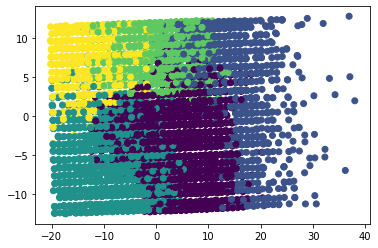

In [58]:
# apply hierarchical clustering
from sklearn.cluster import AgglomerativeClustering


# create a hierarchical clustering object
hierarchical = AgglomerativeClustering(n_clusters = 5)


# fit the data
hierarchical.fit(trek_data)


# get the cluster labels
labels = hierarchical.labels_
labels


# add the labels to the dataframe
trek_data["Cluster"] = labels


# print the cluster centers
print(hierarchical.n_leaves_)


trek_data.head()


# apply PCA
from sklearn.decomposition import PCA


# create a PCA object
pca = PCA(n_components = 2)


# fit the data
pca.fit(trek_data)


# transform the data
transformed_data = pca.transform(trek_data)


# print the transformed data
print(transformed_data)


# print the explained variance
print(pca.explained_variance_ratio_)
# plot the transformed data
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c = labels)

plt.show()

In [59]:
df = pd.DataFrame(transformed_data, columns = ["PC1", "PC2"])

In [ ]:
df.to_

In [ ]:
# this is new